# Developing an AI application to recognise flower species - Part 2

## Introduction

In an [earlier project](https://github.com/pranath/flower_recognition/blob/master/image_classifier.ipynb) I developed a deep learning image classifier to classify images of 102 categories of flower species from the Oxford visual geometry group. The deep learning library used for that project was PyTorch, and the best result achieved in that project was a test accuracy of 73%.

In this project we will look at the same dataset, but will use a new deep learning library called [fastai](https://www.fast.ai) (which is based on PyTorch) to develop an image classifier, and we will compare the results.

## Dataset

The data was sourced from [this udacity bucket](https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz) on aws.

## Import libraries & config

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Set batch size
bs = 64
# Get transforms
tfms = get_transforms(do_flip=False)

## Explore dataset

We will look at the same images from my [last study](https://github.com/pranath/flower_recognition/blob/master/image_classifier.ipynb) to validate we have the same dataset used as previously.

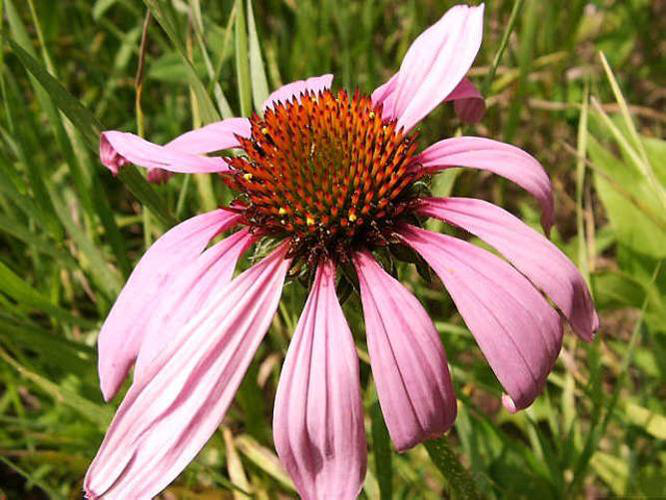

In [4]:
# Image from training sub-set
img = Image.open("flowers/train/17/image_03844.jpg")
img

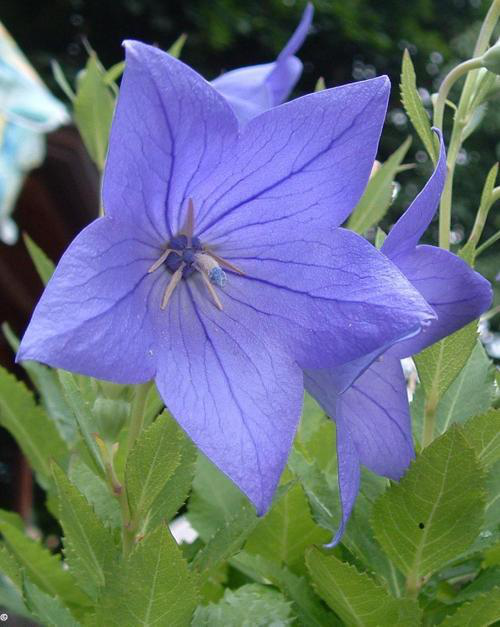

In [5]:
# Image from validation sub-set
img = Image.open("flowers/valid/19/image_06195.jpg")
img

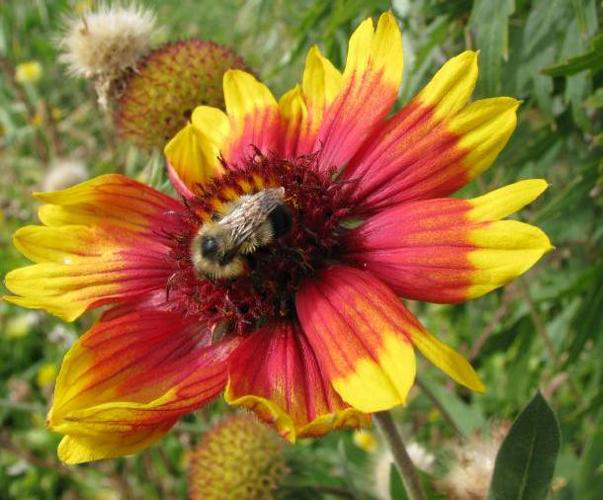

In [6]:
# Image from testing sub-set
img = Image.open("flowers/test/100/image_07896.jpg")
img

In [7]:
# Set up fastai data bunch object - low res images 26x26
data = ImageDataBunch.from_folder('flowers', ds_tfms=tfms, size=26) # 
data

ImageDataBunch;

Train: LabelList (6552 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
60,60,60,60,60
Path: flowers;

Valid: LabelList (818 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
60,60,60,60,60
Path: flowers;

Test: None

In [28]:
# Show classes
print(data.classes)
len(data.classes),data.c

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


(102, 102)

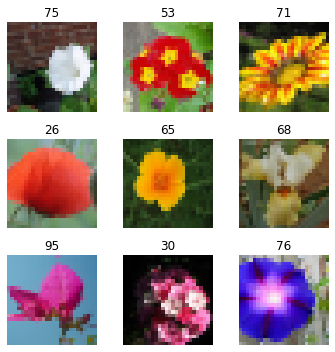

In [8]:
# A quick look at some of these low res images 26x26 with handy fastai function
data.show_batch(rows=3, figsize=(5,5))

## Create model using resnet34

In [10]:
# Create initial pre-trained model - resnet34
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
# Train for 4 epochs - by default this only trains last layer and leaves rest of network frozen
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,5.161704,3.819122,0.779951,00:29
1,4.054299,3.213806,0.722494,00:21
2,3.516429,2.934814,0.689487,00:21
3,3.168790,2.860296,0.677262,00:22


In [12]:
# Save model
learn.save('flowers-model-1')

So the results with resnet34 are a little dissapointing, with it struggle to get below an error rate of 60-70% - lets try some fine tuning.

### Fine tune model

In [13]:
# Unfreeze all units in network
learn.unfreeze()

In [14]:
# fastai uses variable learning rates for different layers of the network
# Lets use this handy function to find the best learning rate range
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


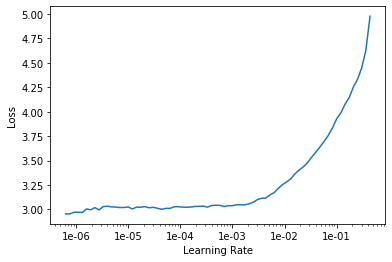

In [15]:
learn.recorder.plot()

In [16]:
# Lets train the whole network some more with our selected learning rate ranges
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,3.038013,2.657803,0.632029,00:21
1,2.827228,2.563755,0.619804,00:21


So even with some fine tuning for training the whole network, it still struggles to get past an error rate of 60%.

### Explore results

Lets examine some of the examples our model found most difficult to classify.

In [17]:
# Get the top losses/mis-classified
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

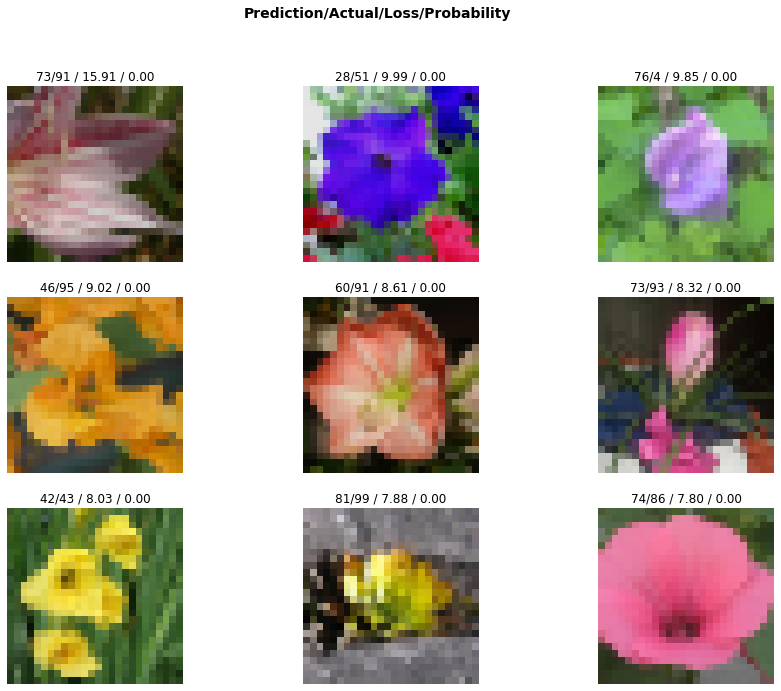

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [26]:
interp.most_confused(min_val=2)

[('50', '48', 4),
 ('82', '77', 4),
 ('1', '64', 3),
 ('33', '77', 3),
 ('35', '77', 3),
 ('38', '77', 3),
 ('41', '83', 3),
 ('48', '65', 3),
 ('57', '77', 3),
 ('73', '81', 3),
 ('75', '64', 3),
 ('83', '74', 3),
 ('88', '36', 3),
 ('89', '46', 3),
 ('9', '28', 3),
 ('94', '77', 3),
 ('11', '43', 2),
 ('11', '77', 2),
 ('15', '48', 2),
 ('18', '85', 2),
 ('22', '77', 2),
 ('23', '77', 2),
 ('29', '38', 2),
 ('30', '66', 2),
 ('41', '60', 2),
 ('43', '94', 2),
 ('44', '72', 2),
 ('46', '65', 2),
 ('47', '65', 2),
 ('50', '65', 2),
 ('52', '81', 2),
 ('53', '85', 2),
 ('58', '56', 2),
 ('62', '77', 2),
 ('64', '75', 2),
 ('68', '64', 2),
 ('69', '77', 2),
 ('72', '30', 2),
 ('73', '83', 2),
 ('74', '101', 2),
 ('74', '70', 2),
 ('74', '86', 2),
 ('74', '96', 2),
 ('75', '51', 2),
 ('76', '73', 2),
 ('76', '75', 2),
 ('76', '77', 2),
 ('76', '98', 2),
 ('78', '13', 2),
 ('78', '73', 2),
 ('79', '77', 2),
 ('82', '14', 2),
 ('82', '98', 2),
 ('83', '41', 2),
 ('84', '77', 2),
 ('88', '72

## Create model using resnet50

In [3]:
# Create data for bigger network using higher resolution images 299x299 and a smaller batch size to compensate for limited GPU resouce!
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder('flowers', ds_tfms=tfms, size=299, bs=bs//2).normalize(imagenet_stats)

In [4]:
# Create model
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


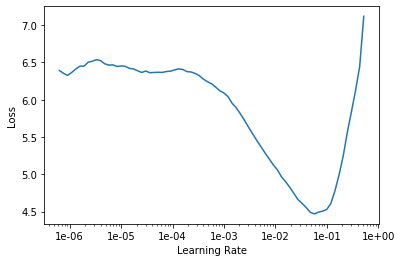

In [5]:
# Use learning rate finder again to find optimal range
learn.lr_find()
learn.recorder.plot()

In [6]:
# Train model
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.471300,0.447591,0.108802,02:01
1,0.659048,0.326610,0.088020,01:59
2,0.399992,0.197767,0.052567,01:59
3,0.258705,0.187676,0.051345,01:59
4,0.160779,0.139959,0.034230,01:59
5,0.093039,0.124097,0.034230,01:59
6,0.063356,0.111429,0.023227,01:59
7,0.053429,0.108530,0.023227,01:59


In [7]:
learn.save('flowers-model-1-50')

So with resnet50 we have achieved much better results, with a current error rate of just 2% i.e. an accuracy of 98%!

### Fine tune model

In [8]:
# Load model and unfreeze whole network
learn.load('flowers-model-1-50');
learn.unfreeze()
# Train model using selected learning rate ranges
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.040713,0.101101,0.024450,02:41
1,0.037347,0.102892,0.025672,02:39
2,0.036942,0.094170,0.019560,02:39


So our fine tuning has just about got us to 99% accuracy (tho 98% rounded up of course).

In [9]:
learn.save('flowers-model-2-50')

### Explore results

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[]

In [11]:
# Look at top mis-classifications
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

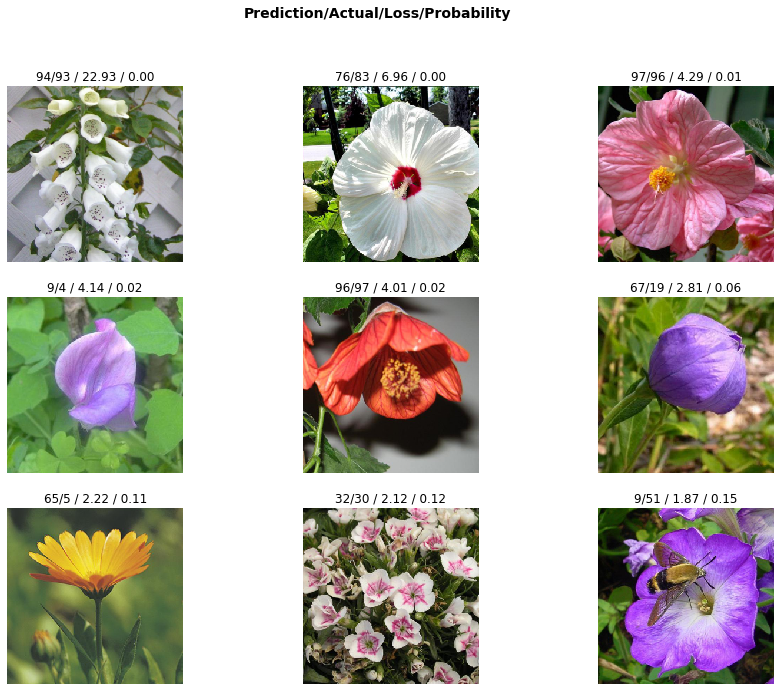

In [12]:
interp.plot_top_losses(9, figsize=(15,11))

## Test accuracy

We will now test our best model on a separate test dataset, as we did with out original study.

In [13]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.load('flowers-model-2-50');

In [14]:
# Create databunch for test dataset (set as 'validation')
tfms = get_transforms(do_flip=False)
data_test = ImageDataBunch.from_folder('flowers', ds_tfms=tfms, size=299, bs=bs//2, train='train',valid='test').normalize(imagenet_stats)
data_test

ImageDataBunch;

Train: LabelList (6552 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
60,60,60,60,60
Path: flowers;

Valid: LabelList (819 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
60,60,60,60,60
Path: flowers;

Test: None

In [15]:
learn.validate(data_test.valid_dl)

[0.079507515, tensor(0.0208)]

So this gives us a test accuracy of 93%.

## Sanity checking

60


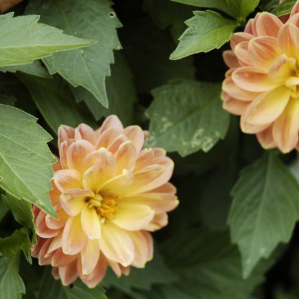

In [16]:
# Show image and actual category
img = learn.data.valid_ds[12][0]
print(learn.data.valid_ds[12][1])
img

In [17]:
# Show model predicted category
learn.predict(img)

(Category 60,
 tensor(59),
 tensor([1.8001e-11, 2.9047e-12, 4.5044e-11, 1.5904e-12, 5.7999e-11, 2.6906e-12,
         4.9365e-13, 3.2170e-12, 3.0225e-13, 3.0792e-12, 8.8208e-13, 1.8894e-11,
         2.9947e-11, 8.4356e-13, 4.2096e-13, 6.1814e-14, 4.9117e-13, 1.0952e-11,
         6.1586e-12, 1.5278e-09, 1.6574e-10, 2.6603e-15, 6.0479e-13, 1.4086e-13,
         3.3331e-10, 1.0875e-13, 1.6059e-12, 3.0775e-11, 7.1300e-10, 2.1380e-11,
         9.7268e-11, 1.2021e-13, 4.8299e-12, 2.0240e-08, 1.3178e-10, 3.9211e-08,
         3.0810e-12, 9.9157e-12, 1.4213e-07, 3.6117e-10, 2.1828e-11, 2.2904e-11,
         4.7791e-14, 2.0690e-12, 2.2970e-12, 3.2915e-13, 2.2139e-12, 4.2431e-10,
         3.7910e-10, 1.8360e-10, 2.3055e-12, 3.5215e-10, 7.3892e-12, 2.0066e-12,
         7.6444e-11, 2.9710e-12, 3.4134e-10, 1.9136e-10, 1.5579e-12, 1.0000e+00,
         5.5715e-10, 9.6803e-12, 1.1862e-12, 3.4749e-10, 3.2568e-11, 9.8466e-12,
         6.4170e-13, 1.5310e-13, 9.8627e-13, 6.6084e-13, 4.5625e-11, 3.3866e-12,
 

63


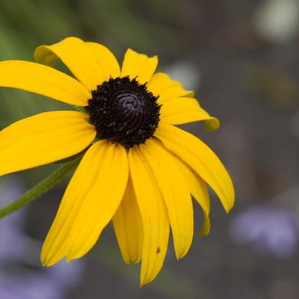

In [18]:
# Show image and actual category
img = learn.data.valid_ds[30][0]
print(learn.data.valid_ds[30][1])
img

In [19]:
# Show model predicted category
learn.predict(img)

(Category 63,
 tensor(62),
 tensor([1.4217e-11, 4.4966e-09, 5.0628e-09, 3.8006e-11, 6.7331e-11, 5.4851e-13,
         1.2987e-08, 4.5111e-11, 3.7278e-11, 4.4839e-09, 4.5585e-08, 9.3114e-09,
         1.4604e-12, 2.0407e-10, 1.1651e-09, 2.7216e-10, 6.1660e-11, 5.9253e-11,
         3.1470e-09, 7.5344e-12, 2.0966e-09, 1.9057e-09, 6.8483e-12, 4.1526e-10,
         1.7067e-13, 7.3371e-12, 1.2166e-11, 1.0972e-11, 4.0521e-12, 1.6364e-12,
         3.9538e-10, 5.4119e-10, 1.1373e-13, 1.5535e-10, 2.1998e-10, 4.2874e-14,
         7.2706e-14, 3.0729e-13, 1.4142e-09, 3.4684e-11, 9.2734e-11, 9.0675e-12,
         6.9092e-11, 4.8820e-10, 2.5655e-10, 7.1966e-10, 1.4073e-07, 3.6443e-07,
         8.9777e-11, 6.3955e-11, 5.3540e-09, 1.4340e-10, 4.5410e-08, 2.3207e-13,
         6.4535e-07, 9.5809e-12, 5.6461e-12, 1.2192e-07, 2.9980e-08, 2.3070e-13,
         2.8282e-12, 1.4447e-10, 1.0000e+00, 6.3438e-09, 5.4883e-08, 3.5611e-08,
         9.9508e-12, 1.8045e-10, 6.2793e-11, 1.4063e-12, 8.4854e-10, 6.6178e-08,
 

78


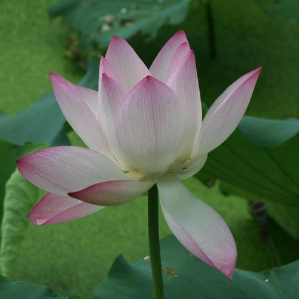

In [20]:
# Show image and actual category
img = learn.data.valid_ds[100][0]
print(learn.data.valid_ds[100][1])
img

In [21]:
# Show model predicted category
learn.predict(img)

(Category 78,
 tensor(78),
 tensor([2.3765e-12, 6.6334e-14, 7.8441e-13, 7.0846e-14, 1.1095e-11, 1.8019e-12,
         2.4836e-15, 3.1392e-10, 5.2349e-13, 6.9455e-13, 5.5262e-11, 1.1692e-11,
         1.0782e-11, 1.3103e-08, 8.0517e-11, 5.3205e-11, 1.2911e-12, 4.5726e-13,
         1.1010e-11, 1.7523e-11, 3.3289e-14, 3.6628e-14, 6.7166e-13, 1.8060e-13,
         1.6233e-10, 2.3617e-14, 1.3594e-16, 1.6893e-12, 8.0413e-13, 3.4603e-14,
         2.0392e-11, 7.2170e-13, 7.9685e-11, 9.7613e-13, 1.5624e-11, 7.0377e-07,
         1.3473e-11, 1.6206e-12, 4.2204e-12, 4.2243e-10, 1.4848e-11, 2.5601e-11,
         2.0952e-13, 1.6134e-13, 7.4979e-14, 2.0631e-12, 4.6117e-14, 2.3800e-14,
         1.3478e-13, 5.9005e-15, 8.3402e-14, 1.6309e-14, 5.3256e-10, 2.4617e-11,
         6.7846e-14, 1.1153e-11, 1.5592e-13, 5.0504e-14, 3.9743e-12, 3.0753e-12,
         2.9873e-11, 4.2811e-13, 1.6283e-13, 4.7002e-14, 8.7225e-16, 3.9366e-12,
         2.3421e-10, 8.1485e-12, 4.3175e-11, 1.3815e-11, 6.0841e-15, 1.7033e-13,
 

## Conclusion

So this project using the fastai library achieved a test accuracy of 93%, a significant improvment on the 73% test accuracy of the [previous project](https://github.com/pranath/flower_recognition/blob/master/image_classifier.ipynb)

The fastai library certainly seems much easier to use, as well as having various pre-configured defaults that seem to produce good results for this project.